In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBRxx import sosf,acf,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=75
max0=125

In [3]:
inputf='595.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,342.000000,342.000000,342.000000,342.000000
mean,99.904500,10.555556,-1082.562604,1266.556696
std,14.726759,7.004072,16198.361637,1791.295646
min,75.096000,0.000000,-299766.779000,0.000000
25%,87.165000,5.000000,-213.857500,306.225000
50%,99.904500,11.000000,-205.920501,595.250000
75%,112.644000,15.000000,-196.784386,1263.250000
max,124.713000,22.000000,-181.618436,9957.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


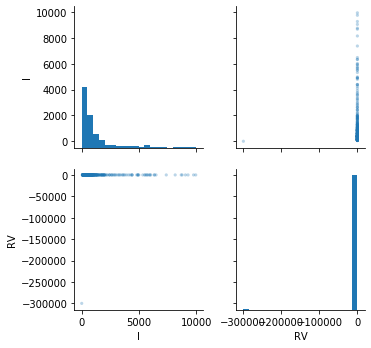

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [7]:
mx=(dt.RV<-100)&(dt.RV>-300)
dt=dt[mx]
dt.describe()

,X,Y,RV,I
count,341.000000,341.000000,341.000000,341.000000
mean,99.875006,10.571848,-206.655811,1270.270938
std,14.738281,7.007872,13.169376,1792.608599
min,75.096000,0.000000,-239.267319,54.730000
25%,87.165000,5.000000,-213.823240,308.100000
50%,99.234000,11.000000,-205.737779,598.000000
75%,112.644000,15.000000,-196.738706,1264.000000
max,124.713000,22.000000,-181.618436,9957.000000


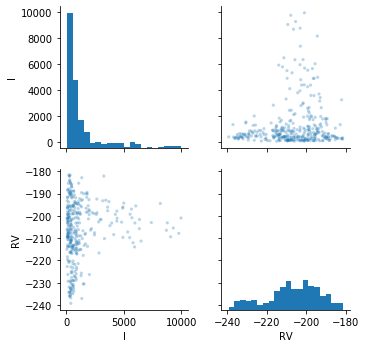

In [8]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

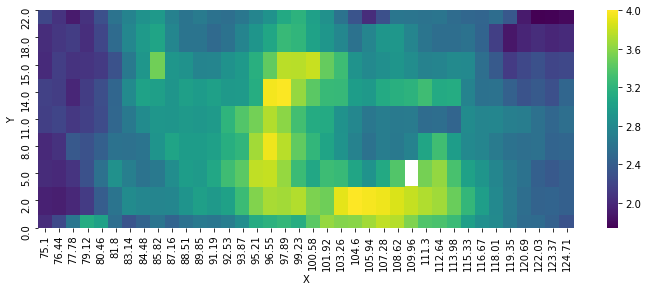

In [9]:
datal=dt.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

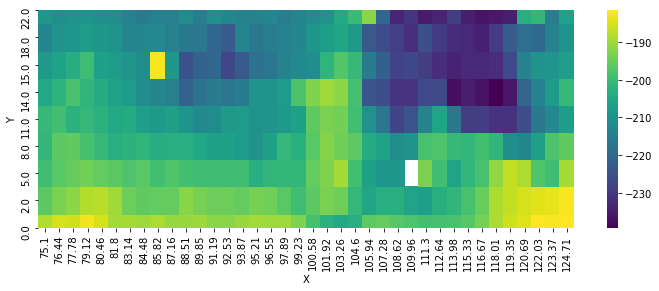

In [10]:
datal=dt.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

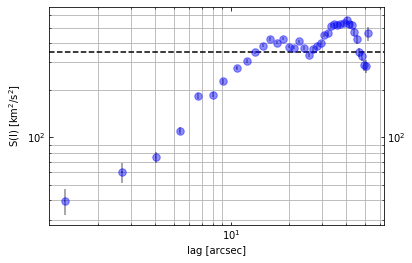

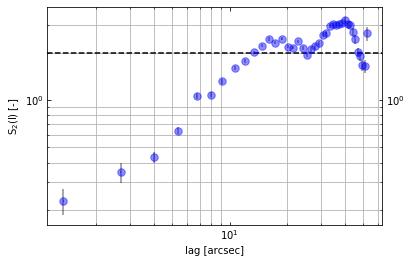

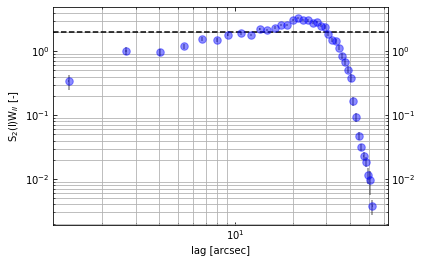

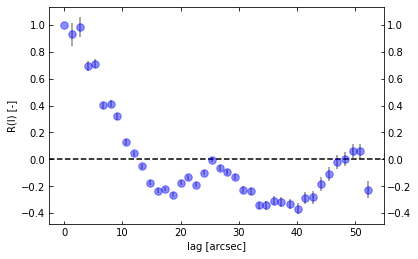

In [11]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
#sfwH00=sosfw(dt)
sfw2H00=sosfw2(dt)
afH00=acf(dt)
#psH00=ps(dt)

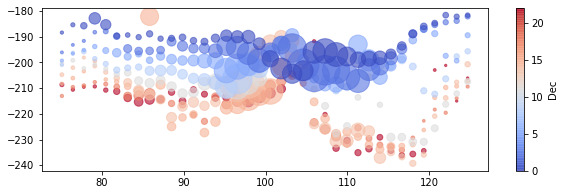

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

In [13]:
pRA = np.poly1d(np.polyfit(dt.X, dt.RV, 3))
print(pRA)

          3          2
0.000875 x - 0.2535 x + 23.91 x - 939


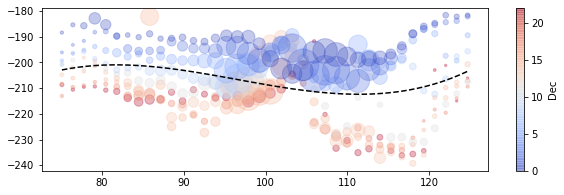

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt.X.min(), dt.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

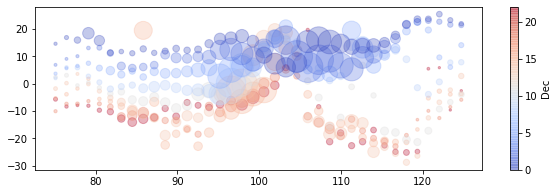

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV - pRA(dt.X), c=dt.Y, s=dt.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

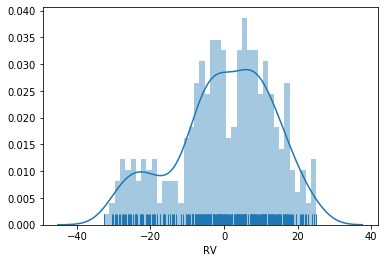

In [16]:
hist=dt.RV-dt.RV.mean()
sns.distplot(hist,bins=40,rug=True)

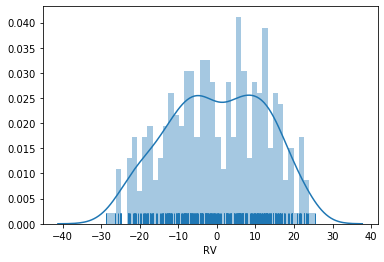

In [17]:
hist2=dt.RV - pRA(dt.X)
sns.distplot(hist2,bins=40,rug=True)

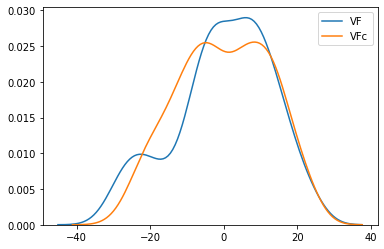

In [18]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc")

In [19]:
dtc= pd.DataFrame({'X': dt.X, 'Y': dt.Y, 'RV':dt.RV - pRA(dt.X), 'I':dt.I})
dtc.describe()

,X,Y,RV,I
count,341.000000,341.000000,3.410000e+02,341.000000
mean,99.875006,10.571848,-1.639458e-13,1270.270938
std,14.738281,7.007872,1.250566e+01,1792.608599
min,75.096000,0.000000,-2.881524e+01,54.730000
25%,87.165000,5.000000,-9.327644e+00,308.100000
50%,99.234000,11.000000,-2.151319e-01,598.000000
75%,112.644000,15.000000,1.039353e+01,1264.000000
max,124.713000,22.000000,2.534391e+01,9957.000000


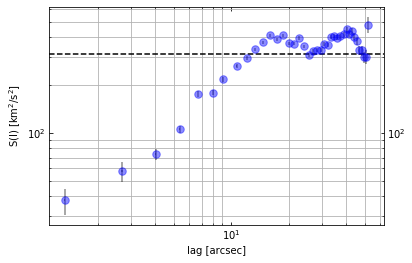

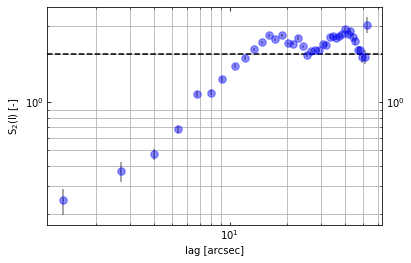

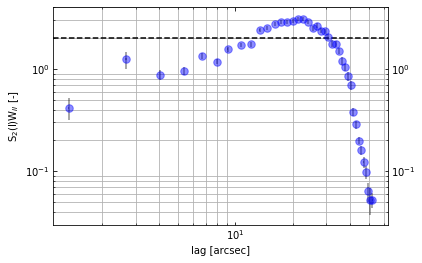

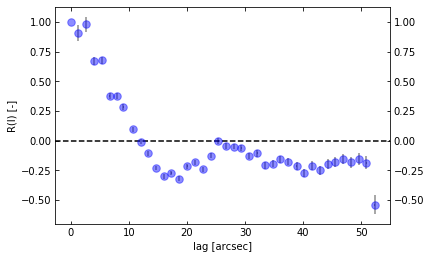

In [20]:
sfH00c=sosf(dtc)
sfnH00c=sosfnorm(dtc)
#sfwH00c=sosfw(dtc)
sfw2H00c=sosfw2(dtc)
afH00c=acf(dtc)
#psH00c=ps(dtc)

In [21]:
#II

In [22]:
mr=(dt.X<120)&(dt.X>80)
dt1=dt[mr]
dt1.describe()

,X,Y,RV,I
count,269.000000,269.000000,269.000000,269.000000
mean,99.867112,10.576208,-208.155622,1555.298104
std,11.633906,7.011634,13.354066,1919.098029
min,80.460000,0.000000,-239.267319,74.990000
25%,89.847000,5.000000,-215.330699,443.200000
50%,99.234000,11.000000,-206.651390,825.300000
75%,109.962000,15.000000,-197.743678,1672.000000
max,119.349000,22.000000,-182.120923,9957.000000


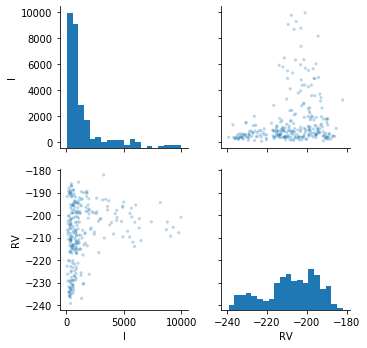

In [23]:
sns.pairplot(dt1, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

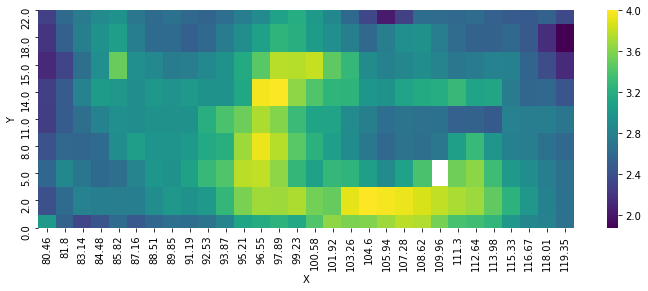

In [24]:
datal=dt1.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

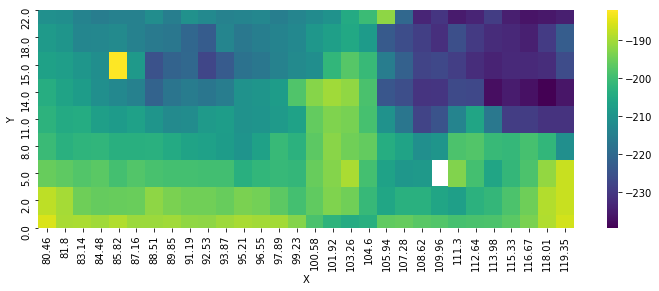

In [25]:
datal=dt1.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

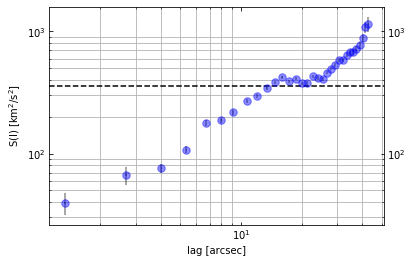

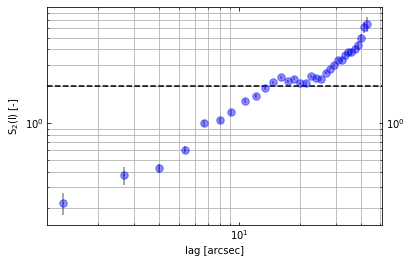

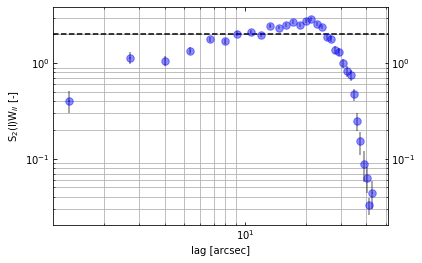

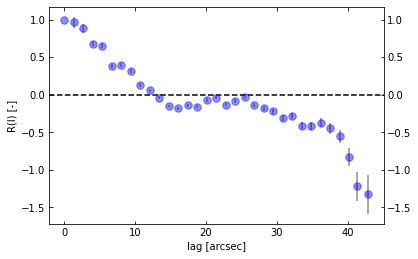

In [26]:
sfH01=sosfs(dt1)
sfnH01=sosfnorms(dt1)
#sfwH01=sosfw(dt1)
sfw2H01=sosfw2(dt1)
afH01=acf(dt1)
#psH01=ps(dt1)

           3           2
-0.000338 x + 0.08886 x - 7.928 x + 35.59


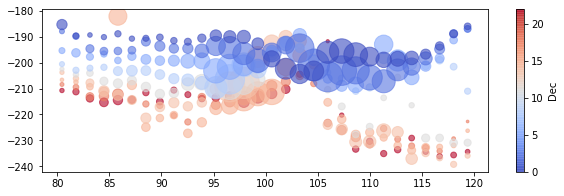

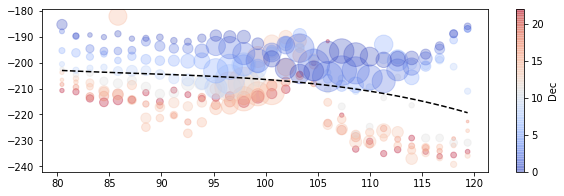

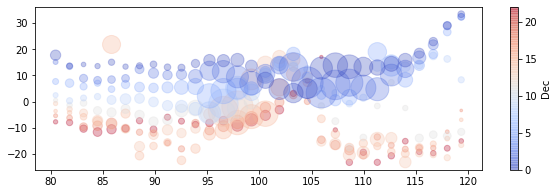

In [27]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt1.X, dt1.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

RAgrid = np.linspace(dt1.X.min(), dt1.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV - pRA(dt1.X), c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")


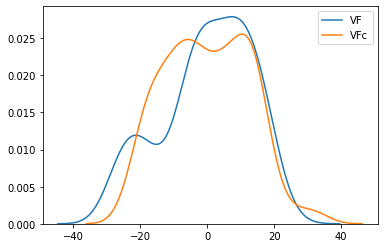

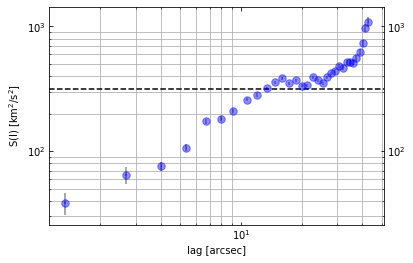

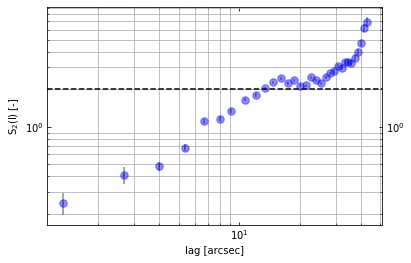

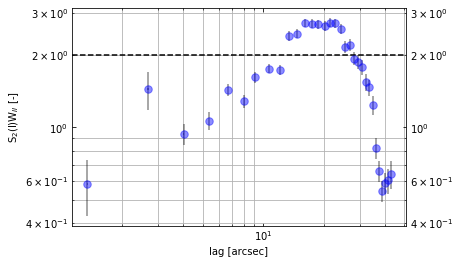

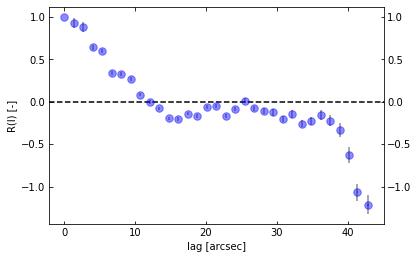

In [28]:
hist=dt1.RV-dt1.RV.mean()
hist2=dt1.RV - pRA(dt1.X)

sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc")

dtc= pd.DataFrame({'X': dt1.X, 'Y': dt1.Y, 'RV':dt1.RV - pRA(dt1.X), 'I':dt1.I})
dtc.describe()

sfH01c=sosfs(dtc)
sfnH01c=sosfnorms(dtc)
#sfwH01c=sosfw(dtc)
sfw2H01c=sosfw2(dtc)
afH01c=acf(dtc)
#psH01c=ps(dtc)

In [29]:
#III

In [30]:
mr=(dt.X<115)&(dt.X>91)
dt2=dt[mr]
dt2.describe()

,X,Y,RV,I
count,161.000000,161.000000,161.000000,161.000000
mean,102.540689,10.590062,-208.239712,2195.893168
std,6.976151,7.023596,12.337267,2244.631463
min,91.188000,0.000000,-237.074651,107.100000
25%,96.552000,5.000000,-215.376379,621.400000
50%,101.916000,11.000000,-206.468668,1291.000000
75%,108.621000,15.000000,-198.520248,2838.000000
max,113.985000,22.000000,-189.429814,9957.000000


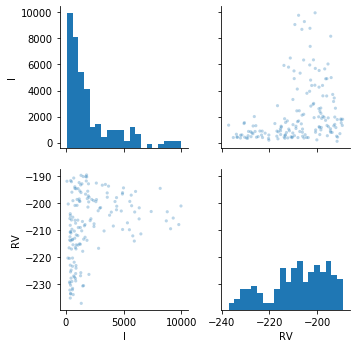

In [31]:
sns.pairplot(dt2, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

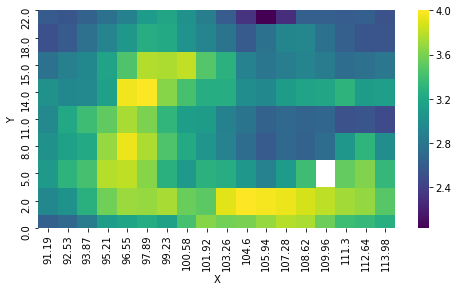

In [32]:
datal=dt2.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

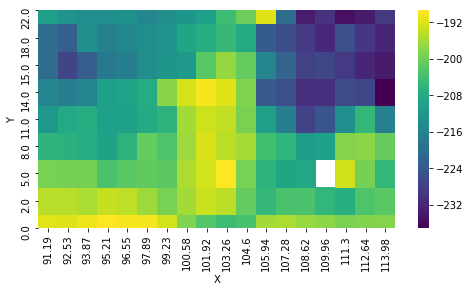

In [33]:
datal=dt2.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

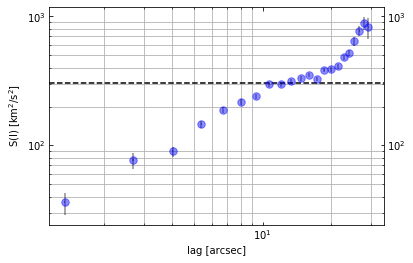

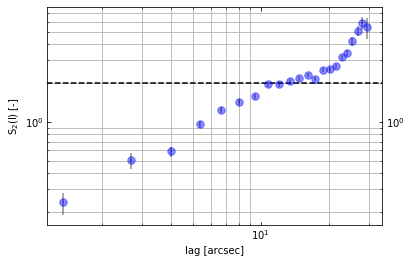

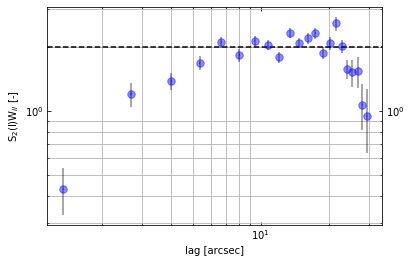

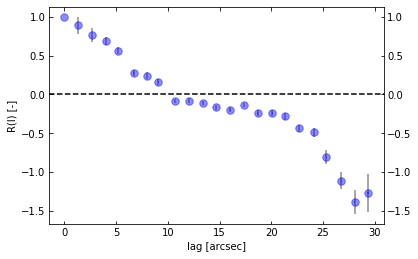

In [34]:
sfH02=sosfs(dt2)
sfnH02=sosfnorms(dt2)
#sfwH02=sosfw(dt2)
sfw2H02=sosfw2(dt2)
afH02=acf(dt2)
#psH02=ps(dt2)

         3         2
0.00448 x - 1.465 x + 158.2 x - 5856


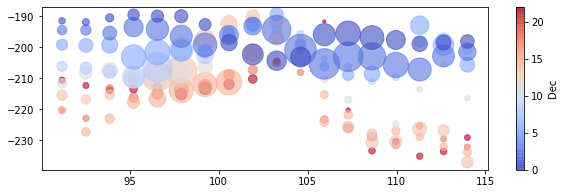

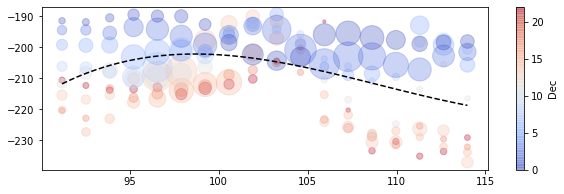

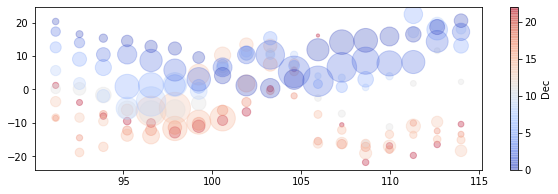

In [35]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt2.X, dt2.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt2.X.min(), dt2.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV - pRA(dt2.X), c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

hist=dt2.RV-dt2.RV.mean()
hist2=dt2.RV - pRA(dt2.X)



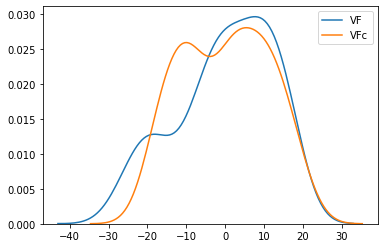

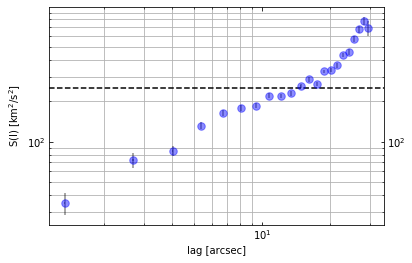

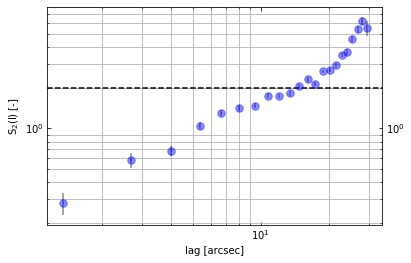

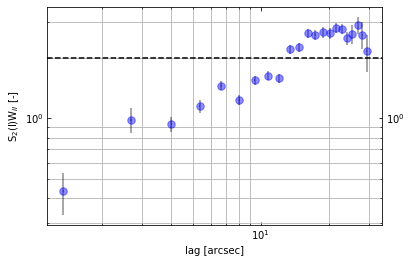

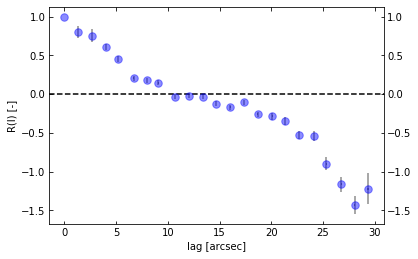

In [36]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc")

dtc= pd.DataFrame({'X': dt2.X, 'Y': dt2.Y, 'RV':dt2.RV - pRA(dt2.X), 'I':dt2.I})
dtc.describe()

sfH02c=sosfs(dtc)
sfnH02c=sosfnorms(dtc)
#sfwH02c=sosfw(dtc)
sfw2H02c=sosfw2(dtc)
afH02c=acf(dtc)
#psH02c=ps(dtc)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


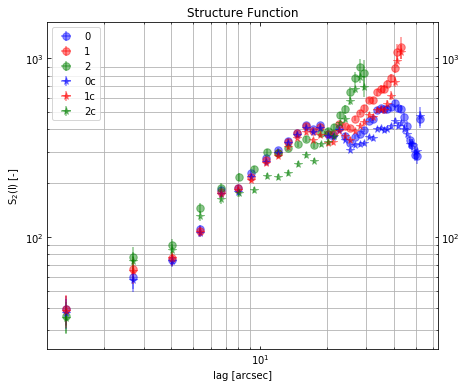

In [37]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfH00['Lag'],sfH00['Nmqvd'],xerr=sfH00.ErrX, yerr=sfH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfH01['Lag'],sfH01['Nmqvd'],xerr=sfH01.ErrX, yerr=sfH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfH02['Lag'],sfH02['Nmqvd'],xerr=sfH02.ErrX, yerr=sfH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfH00c['Lag'],sfH00c['Nmqvd'],xerr=sfH00c.ErrX, yerr=sfH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


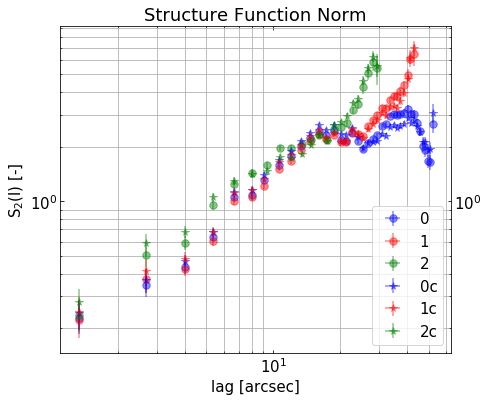

In [38]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00['Lag'],sfnH00['Nmqvd'],xerr=sfnH00.ErrX, yerr=sfnH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfnH01['Lag'],sfnH01['Nmqvd'],xerr=sfnH01.ErrX, yerr=sfnH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfnH02['Lag'],sfnH02['Nmqvd'],xerr=sfnH02.ErrX, yerr=sfnH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfnH00c['Lag'],sfnH00c['Nmqvd'],xerr=sfnH00c.ErrX, yerr=sfnH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfnH01c['Lag'],sfnH01c['Nmqvd'],xerr=sfnH01c.ErrX, yerr=sfnH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfnH02c['Lag'],sfnH02c['Nmqvd'],xerr=sfnH02c.ErrX, yerr=sfnH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Structure Function Norm')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00['Lag'],sfwH00['Nmqvd'],xerr=sfwH00.ErrX, yerr=sfwH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfwH01['Lag'],sfwH01['Nmqvd'],xerr=sfwH01.ErrX, yerr=sfwH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfwH02['Lag'],sfwH02['Nmqvd'],xerr=sfwH02.ErrX, yerr=sfwH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfwH00c['Lag'],sfwH00c['Nmqvd'],xerr=sfwH00c.ErrX, yerr=sfwH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfwH01c['Lag'],sfwH01c['Nmqvd'],xerr=sfwH01c.ErrX, yerr=sfwH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfwH02c['Lag'],sfwH02c['Nmqvd'],xerr=sfwH02c.ErrX, yerr=sfwH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W(l) [-]')
plt.title('Structure Function W')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

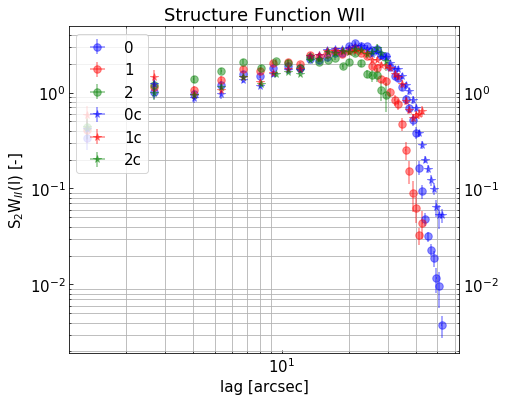

In [39]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfw2H01['Lag'],sfw2H01['Nmqvd'],xerr=sfw2H01.ErrX, yerr=sfw2H01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfw2H02['Lag'],sfw2H02['Nmqvd'],xerr=sfw2H02.ErrX, yerr=sfw2H02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfw2H00c['Lag'],sfw2H00c['Nmqvd'],xerr=sfw2H00c.ErrX, yerr=sfw2H00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfw2H01c['Lag'],sfw2H01c['Nmqvd'],xerr=sfw2H01c.ErrX, yerr=sfw2H01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfw2H02c['Lag'],sfw2H02c['Nmqvd'],xerr=sfw2H02c.ErrX, yerr=sfw2H02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W$_{II}$(l) [-]')
plt.title('Structure Function WII')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

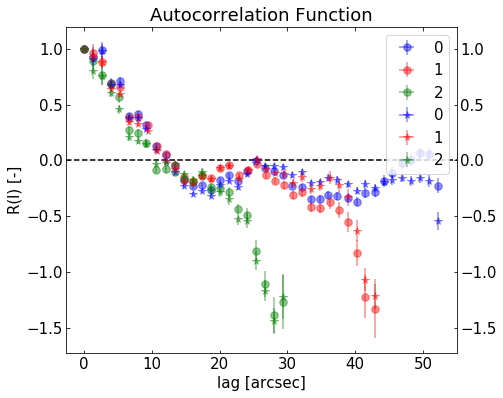

In [40]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00['Lag'],afH00['Nmqvd'],xerr=afH00.ErrX, yerr=afH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(afH01['Lag'],afH01['Nmqvd'],xerr=afH01.ErrX, yerr=afH01.ErrY, fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(afH02['Lag'],afH02['Nmqvd'],xerr=afH02.ErrX, yerr=afH02.ErrY, fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(afH00c['Lag'],afH00c['Nmqvd'],xerr=afH00c.ErrX, yerr=afH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(afH01c['Lag'],afH01c['Nmqvd'],xerr=afH01c.ErrX, yerr=afH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(afH02c['Lag'],afH02c['Nmqvd'],xerr=afH02c.ErrX, yerr=afH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
#ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.axhline(y=0, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
plt.title('Autocorrelation Function')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(psH00['k'],psH00['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(psH01['k'],psH01['Pk'], fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(psH02['k'],psH02['Pk'], fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(psH00c['k'],psH00c['Pk'], fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(psH01c['k'],psH01c['Pk'], fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(psH02c['k'],psH02c['Pk'], fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='k [1/arcsec]', ylabel='P(k) [-]')
plt.title('Power Spectrum')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"